In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails= json.load(open("/content/drive/MyDrive/kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset --force

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:10<00:00, 210MB/s]
100% 2.04G/2.04G [00:10<00:00, 202MB/s]


In [ ]:
!ls

drive  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

['color', 'segmented', 'grayscale']


In [ ]:
print(len(os.listdir("plantvillage dataset/color")))

38


In [ ]:
print(os.listdir("plantvillage dataset/color"))

['Raspberry___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Esca_(Black_Measles)', 'Apple___Apple_scab', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Grape___healthy', 'Peach___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Potato___healthy', 'Pepper,_bell___healthy', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Grape___Black_rot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy', 'Peach___healthy', 'Tomato___Target_Spot', 'Strawberry___healthy'

In [ ]:
print(len(os.listdir("plantvillage dataset/grayscale")))

38


In [ ]:
print(os.listdir("plantvillage dataset/grayscale")[:4])

['Raspberry___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Esca_(Black_Measles)']


In [ ]:
print(len(os.listdir("plantvillage dataset/segmented")))

38


In [ ]:
print(os.listdir("plantvillage dataset/segmented")[:4])

['Raspberry___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Esca_(Black_Measles)']


In [ ]:
print(len(os.listdir("plantvillage dataset/segmented/Tomato___healthy")))
print(os.listdir("plantvillage dataset/segmented/Tomato___healthy")[:1])

1591
['6cabb19a-2a35-4897-a646-a13e3cf494c6___RS_HL 0591_final_masked.jpg']


In [ ]:
base_dir='plantvillage dataset/color'

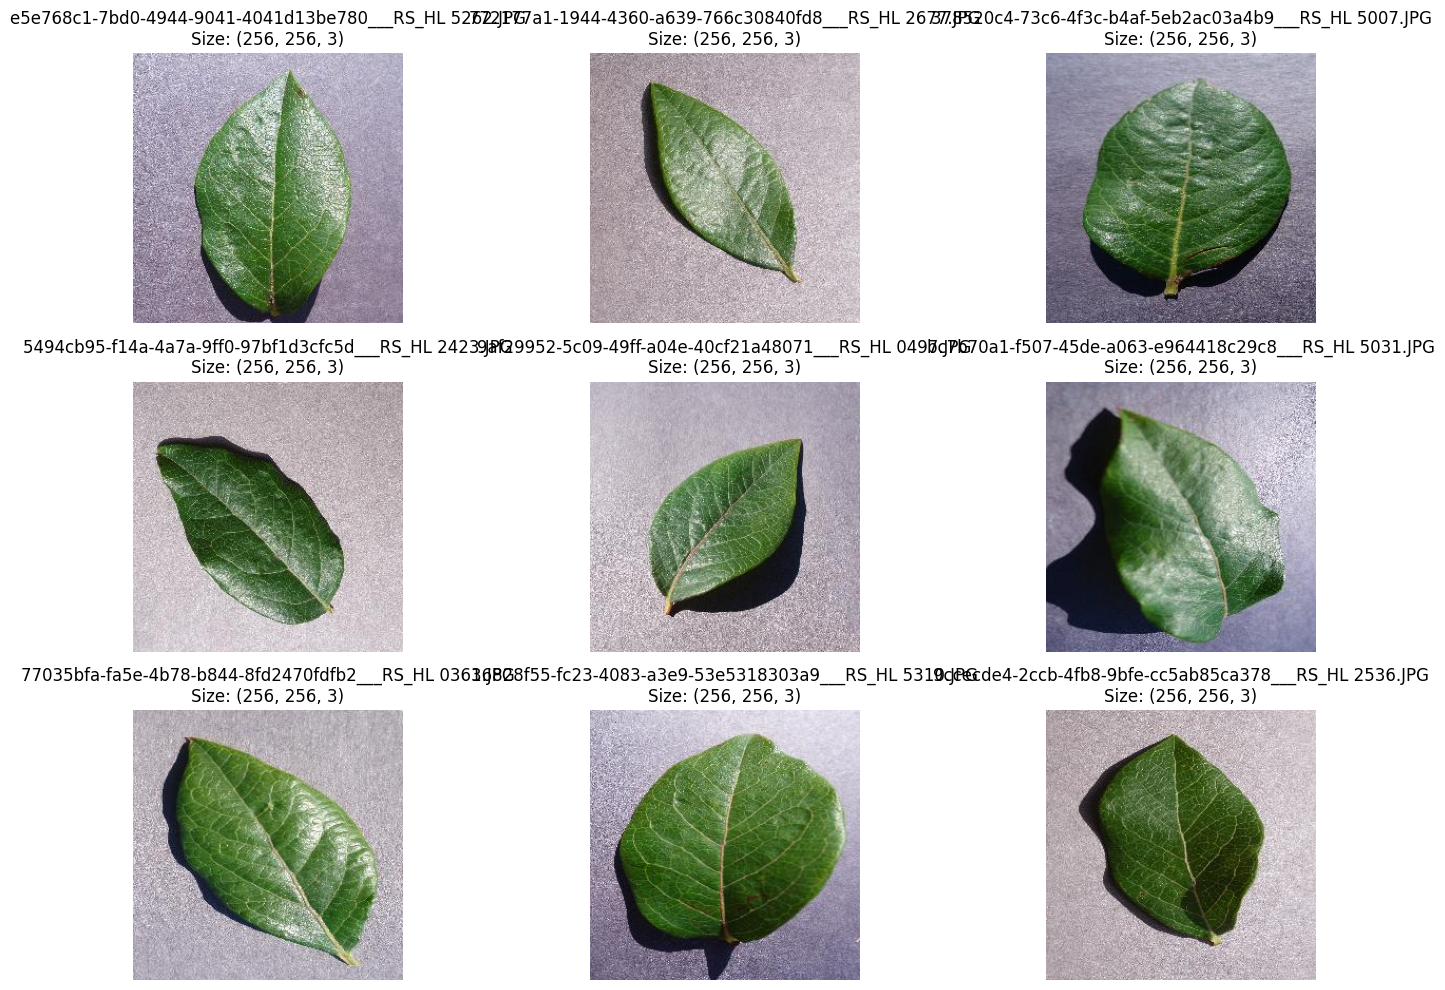

In [ ]:
def show_images(base_dir, num_images=9, figsize=(15, 10)):
    image_files = [f for f in os.listdir(base_dir)[:num_images] if os.path.isfile(os.path.join(base_dir, f))]
    if not image_files:
        print("No image files found in the directory.")
        return

    num_cols = 3
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create subplots for the images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, image_file in enumerate(image_files):
        row = i // num_cols
        col = i % num_cols
        image_path = os.path.join(base_dir, image_file)
        img = mpimg.imread(image_path)
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"{image_file}\nSize: {img.shape}")
        axes[row, col].axis('off')

    # Hide any unused subplots
    for i in range(len(image_files), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()
# Call the function to display images
show_images('plantvillage dataset/color/Blueberry___healthy')

(256, 256, 3)


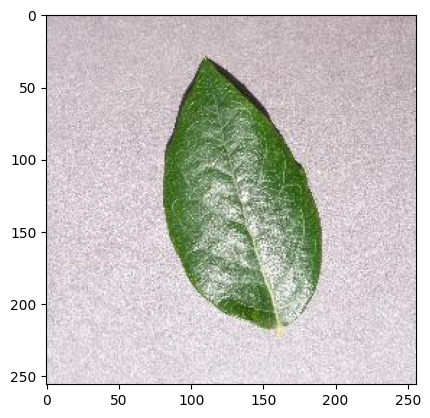

In [ ]:
imagepath='/content/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG'
img=mpimg.imread(imagepath)
print(img.shape)
plt.imshow(img)

In [ ]:
img_size = 212
batch_size= 32

In [ ]:
data_gen =ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

In [ ]:
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,#32
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),#224,224
    batch_size=batch_size,#32
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 105, 105, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 103, 103, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 51, 51, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 166464)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=5,
    validation_data= validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.0285 - accuracy: 0.9923 - val_loss: 0.8333 - val_accuracy: 0.8748
Epoch 2/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.9696 - val_accuracy: 0.8567
Epoch 3/5
1358/1358 [==============================] - 100s 74ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.9453 - val_accuracy: 0.8654
Epoch 4/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 1.3659 - val_accuracy: 0.8411
Epoch 5/5
1358/1358 [==============================] - 103s 76ms/step - loss: 0.0333 - accuracy: 0.9919 - val_loss: 1.2091 - val_accuracy: 0.8389


In [ ]:
print("Evaluating the model..")
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print(f"Validation Accuracy :{val_accuracy*100:.2f}%")

Evaluating the model..
339/339 [==============================] - 19s 56ms/step - loss: 0.5821 - accuracy: 0.8794
Validation Accuracy :87.94%


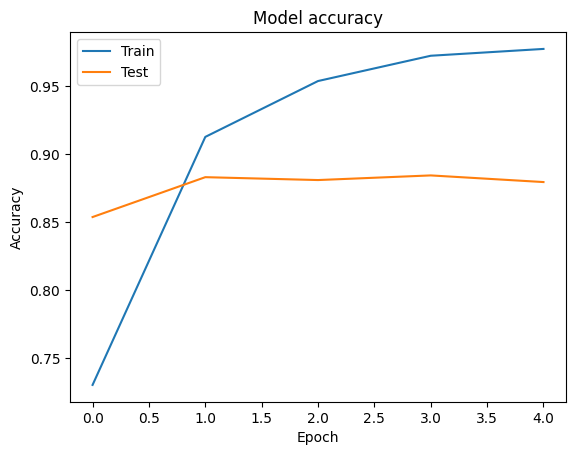

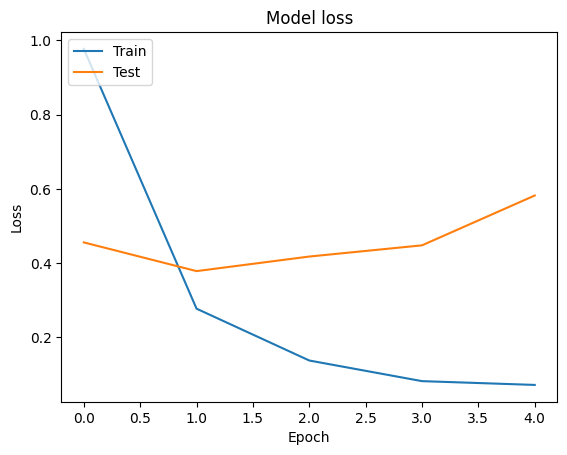

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path,target_size=(212,212)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255.
  return img_array
def predict_image_class(model,image_path,class_indices):
    preprocessed_img=load_and_preprocess_image(image_path)
    predictions=model.predict(preprocessed_img)
    predicted_class_index=np.argmax(predictions,axis=1)[0]
    predicted_class_name=class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices={v: k for k,v in train_generator.class_indices.items()}
class_indices

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("name",predicted_class_name)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model
model.save('/content/drive/MyDrive/models/plant.h5')

In [ ]:
#from google.colab import files
#files.download('/content/drive/MyDrive/models/plant.h5')